In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
from datasets import load_dataset

df_original = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

# Data Cleaning
df_original['job_posted_date']=pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills']=df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filter US
df_US=df_original[df_original['job_country']=='United States']

In [3]:
# Explode job skills
df_skills=df_US.explode('job_skills')

# Skills count
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skill_count').sort_values(by='skill_count',ascending=False)

In [4]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


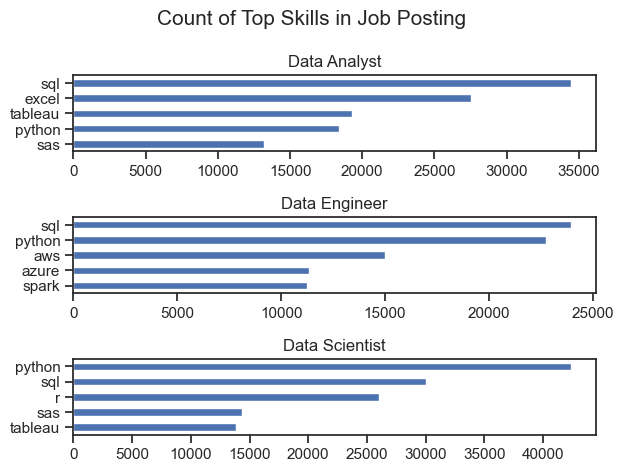

In [24]:
job_titles=['Data Analyst','Data Engineer','Data Scientist']

# Plot
fig,ax=plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
    plt.tight_layout()
    ax[i].set(ylabel='')
    ax[i].invert_yaxis()
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Job Posting',size=15)
plt.tight_layout()

In [25]:
df_jobs_count=df_US['job_title_short'].value_counts().reset_index(name='job_total')

# Merge with df_skills_count
df_skill_percentage=df_skills_count.merge(df_jobs_count,how='left',on='job_title_short')

# Calculate percentage
df_skill_percentage['skill_percentage']=(df_skill_percentage['skill_count']/df_skill_perc['job_total'])*100
df_skill_percentage

,job_skills,job_title_short,skill_count,job_total,skill_percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


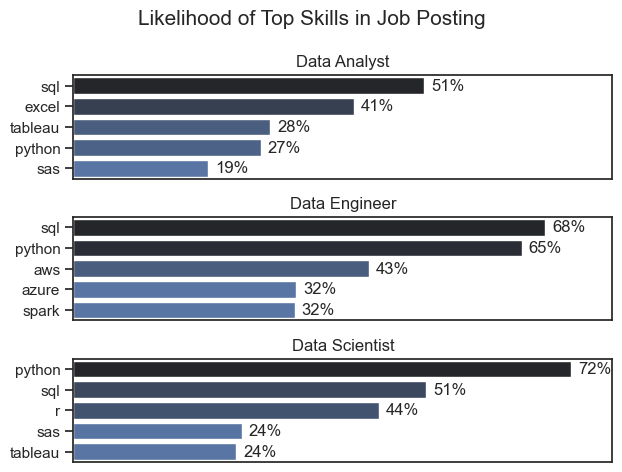

In [41]:
# Plot
fig,ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot=df_skill_percentage[df_skill_percentage['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,x='skill_percentage',y='job_skills',hue='skill_percentage',ax=ax[i],palette='dark:b_r')
    ax[i].set(xlabel='',ylabel='',xlim=(0,78),title=job_title,xticks=([]))
    ax[i].legend().set_visible(False)
    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')

fig.suptitle('Likelihood of Top Skills in Job Posting',size=15)
plt.tight_layout()